**<font size=5> Module Title: Artificial Intelligence / Data Visualisation & Comms </font>**

**<font size=5> Assessment Title: Individual </font>**

**<font size=4> Lecturer Name: Dr.David McQuaid / Dr.Sam Weiss </font>**

**<font size=4> Student Name: Chia Hua Lin &emsp; &emsp; ID: 2020044 </font>**

========================================================================================================

# <font color=red size=6> Tasks for Artificial Intelligence </font>

<font size=3> Ciara is looking for employees for her new company, which develops and provides AI based logistic software for retailers. Ciara has determined that she needs: </font>

<font size=3> Python Programmers, 2 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer. Assume that if a person has two abilities, he or she can take on two roles in the company. </font>

<font size=3> So Ciara narrowed down her selections to the following people: </font>



**Name &nbsp;  Abilities**  
Peter &nbsp;&nbsp; Python and AI  
Juan &nbsp;&nbsp; Web and AI  
Jim &nbsp;&nbsp; AI and Systems  
Jane &nbsp;&nbsp; Python and Database  
Mary &nbsp;&nbsp; Web and Systems  
Bruce &nbsp;&nbsp; Systems and Python  
Anita &nbsp;&nbsp; Web and AI  

# Scenario 1:   

## Problem Statement

Ciara knows Python and has funds to hire three more people. The hiring needs are as follows:

- 2 Python Programmers
- 3 AI Engineers
- 1 Web Designer
- 1 Database Admin
- 1 Systems Engineer

The goal is to utilize a Constraint Satisfaction Problem (CSP) framework to determine if the hiring needs can be met, considering that Ciara knows Python and only has funds to hire three more people.

In [1]:
!pip install python-constraint

  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24081 sha256=1185cac8b808ebe87fb814cf03798ddf90ba636ce02c54d1ba005b65af496d87
  Stored in directory: /Users/awa/Library/Caches/pip/wheels/51/36/1f/c2ccb8dc4eba38c5215636d4ae2c480b32069cab0376bcc1a4
Successfully built python-constraint


In [10]:
# Define the list of potential candidates and their abilities
candidates = {
    'Peter': ['Python', 'AI'],
    'Juan': ['Web', 'AI'],
    'Jim': ['AI', 'Systems'],
    'Jane': ['Python', 'Database'],
    'Mary': ['Web', 'Systems'],
    'Bruce': ['Systems', 'Python'],
    'Anita': ['Web', 'AI']
}

# Ciara's requirements
required_roles = {
    'Python Programmer': 2,
    'AI Engineer': 2,
    'Web Designer': 1,
    'Database Admin': 1,
    'Systems Engineer': 1
}

# Initialize the selected candidates list
selected_candidates = []

# Ciara knows Python and wants to hire three more people
ciara_knows_python = True
remaining_positions = 3

# Iterate through the candidates and select based on criteria
for candidate, abilities in candidates.items():
    
    if not ciara_knows_python and remaining_positions > 0:
        selected_candidates.append((candidate, abilities))
        remaining_positions -= 1
        
    elif ciara_knows_python and 'Python' in abilities and remaining_positions > 0:
        selected_candidates.append((candidate, abilities))
        remaining_positions -= 1

# Display the selected candidates
selected_candidates

[('Peter', ['Python', 'AI']),
 ('Jane', ['Python', 'Database']),
 ('Bruce', ['Systems', 'Python'])]

# Scenario 2

## CSP Framework for Hiring Problem

## Problem Statement

Ciara and Juan have become partners, and with additional funds, they can now employ four more people. However, they must hire another AI Engineer. The hiring needs are as follows:

- 2 Python Programmers
- 3 AI Engineers
- 1 Web Designer
- 1 Database Admin
- 1 Systems Engineer

The goal is to utilize a Constraint Satisfaction Problem (CSP) framework to determine if the hiring needs can be met, and if so, detail who would be hired.

In [19]:
from constraint import Problem

# Define the CSP problem
problem = Problem()

# Define the roles
roles = [
    'Python Programmer 1', 
    'Python Programmer 2',
    'AI Engineer 1', 
    'AI Engineer 2', 
    'AI Engineer 3',
    'Web Designer', 
    'Database Admin', 
    'Systems Engineer'
]

# Define the candidates and their abilities
candidates = {
    'Peter': ['Python', 'AI'],
    'Juan': ['Web', 'AI'],
    'Jim': ['AI', 'Systems'],
    'Jane': ['Python', 'Database'],
    'Mary': ['Web', 'Systems'],
    'Bruce': ['Systems', 'Python'],
    'Anita': ['Web', 'AI']
}

# Add variables to the problem
for role in roles:
    problem.addVariable(role, list(candidates.keys()))

# Define the constraints
# 2 Python Programmers
problem.addConstraint(lambda p1, p2: p1 != p2, ('Python Programmer 1', 'Python Programmer 2'))

# 3 AI Engineers
problem.addConstraint(lambda a1, a2, a3: len({a1, a2, a3}) == 3, ('AI Engineer 1', 'AI Engineer 2', 'AI Engineer 3'))

# 1 Web Designer, 1 Database Admin, 1 Systems Engineer
problem.addConstraint(lambda w: w == 'Juan', ('Web Designer',))  # Juan is the Web Designer
problem.addConstraint(lambda d: d == 'Jane', ('Database Admin',))  # Jane is the Database Admin
problem.addConstraint(lambda s: s == 'Bruce', ('Systems Engineer',))  # Bruce is the Systems Engineer

# Solve the CSP
solutions = problem.getSolutions()

# Display only 5 to 6 sets of solutions
num_solutions_to_display = min(6, len(solutions))
for i in range(num_solutions_to_display):
# for i in range(len(solutions)):
    print("\033[1m" + f"\nSolution {i + 1}:" + "\033[0m")
    for role in roles:
        print(f"{role}: {solutions[i][role]}")


Solution 1:
Python Programmer 1: Anita
Python Programmer 2: Bruce
AI Engineer 1: Anita
AI Engineer 2: Bruce
AI Engineer 3: Mary
Web Designer: Juan
Database Admin: Jane
Systems Engineer: Bruce

Solution 2:
Python Programmer 1: Anita
Python Programmer 2: Mary
AI Engineer 1: Anita
AI Engineer 2: Bruce
AI Engineer 3: Mary
Web Designer: Juan
Database Admin: Jane
Systems Engineer: Bruce

Solution 3:
Python Programmer 1: Anita
Python Programmer 2: Jane
AI Engineer 1: Anita
AI Engineer 2: Bruce
AI Engineer 3: Mary
Web Designer: Juan
Database Admin: Jane
Systems Engineer: Bruce

Solution 4:
Python Programmer 1: Anita
Python Programmer 2: Jim
AI Engineer 1: Anita
AI Engineer 2: Bruce
AI Engineer 3: Mary
Web Designer: Juan
Database Admin: Jane
Systems Engineer: Bruce

Solution 5:
Python Programmer 1: Anita
Python Programmer 2: Juan
AI Engineer 1: Anita
AI Engineer 2: Bruce
AI Engineer 3: Mary
Web Designer: Juan
Database Admin: Jane
Systems Engineer: Bruce

Solution 6:
Python Programmer 1: Anita


# Constraint Satisfaction for Role Assignment in Artificial Intelligence Tasks

## Senerio 2 - Question 2

In [14]:
from constraint import Problem, AllDifferentConstraint

# Define the roles and candidates
roles = ['Python Programmer 1', 
         'Python Programmer 2', 
         'AI Engineer 1', 
         'AI Engineer 2', 
         'AI Engineer 3',
         'Web Designer', 
         'Database Admin', 
         'Systems Engineer'
        ]

candidates = {
    'Peter': ['Python', 'AI'],
    'Juan': ['Web', 'AI'],
    'Jim': ['AI', 'Systems'],
    'Jane': ['Python', 'Database'],
    'Mary': ['Web', 'Systems'],
    'Bruce': ['Systems', 'Python'],
    'Anita': ['Web', 'AI']
}

# Function to initialize a CSP problem
def initialize_csp():
    problem = Problem()

    # Add variables and their domains
    for role in roles:
        problem.addVariable(role, list(candidates.keys()))

    # Add constraints (e.g., each candidate can only be assigned to one role)
    problem.addConstraint(AllDifferentConstraint(), roles)

    return problem

# Solve the CSP problem
csp_problem = initialize_csp()
solutions = csp_problem.getSolutions()

# Display the solutions
if solutions:
    print("Solution:")
    for solution in solutions[0]:
        print(f"{solution}: {solutions[0][solution]}")
else:
    print("No solution found.")

No solution found.


# Genetic Algorithm for Optimized Role Assignment in Artificial Intelligence Tasks

## Senerio 2 - Question 3

In [18]:
import random

# Define the roles and candidates
roles = ['Python Programmer 1', 
         'Python Programmer 2', 
         'AI Engineer 1', 
         'AI Engineer 2', 
         'AI Engineer 3',
         'Web Designer', 
         'Database Admin', 
         'Systems Engineer'
        ]

candidates = {
    'Peter': ['Python', 'AI'],
    'Juan': ['Web', 'AI'],
    'Jim': ['AI', 'Systems'],
    'Jane': ['Python', 'Database'],
    'Mary': ['Web', 'Systems'],
    'Bruce': ['Systems', 'Python'],
    'Anita': ['Web', 'AI']
}

# Genetic Algorithm parameters
population_size = 10
generations = 100
mutation_rate = 0.1  # Adjust as needed

# Function to calculate the fitness of a solution
def fitness(solution):
    
    # For example, you might penalize solutions that violate constraints or prioritize specific skills
    score = 0
    for role, candidate in solution:
        if candidate in candidates and role in roles:
            score += 1

    return score

# Function to initialize a random population
def initialize_population():
    return [(role, random.choice(list(candidates.keys()))) for role in roles]

# Function to apply mutation to an individual
def mutate(individual):
    
    # Apply mutation with a certain probability
    if random.random() < mutation_rate:
        role_to_mutate = random.choice(roles)
        new_candidate = random.choice(list(candidates.keys()))
        individual[roles.index(role_to_mutate)] = (role_to_mutate, new_candidate)

# Genetic Algorithm main loop
def genetic_algorithm():
    population = [initialize_population() for _ in range(population_size)]

    for generation in range(generations):
        
        # Evaluate the fitness of each individual in the population
        fitness_scores = [fitness(individual) for individual in population]

        # Select individuals for reproduction (based on fitness)
        selected_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)[:population_size // 2]]

        # Apply crossover and mutation to create a new generation
        new_population = []
        
        for _ in range(population_size // 2):
            parent1, parent2 = random.sample(selected_population, 2)
            crossover_point = random.randint(1, len(roles) - 1)
            child = parent1[:crossover_point] + parent2[crossover_point:]
            
            # Apply mutation
            mutate(child)
            new_population.append(child)

        # Replace the old population with the new generation
        population = new_population

    # Return the best solution from the final population
    best_solution = max(population, key=fitness)
    return best_solution

# Run the Genetic Algorithm
best_solution = genetic_algorithm()

# Display the best solution
print("\033[1m" + "Best Solution:" + "\033[0m")
for role, candidate in best_solution:
    print(f"{role}: {candidate}")

Best Solution:
Python Programmer 1: Jane
Python Programmer 2: Anita
AI Engineer 1: Jim
AI Engineer 2: Jane
AI Engineer 3: Peter
Web Designer: Bruce
Database Admin: Anita
Systems Engineer: Juan


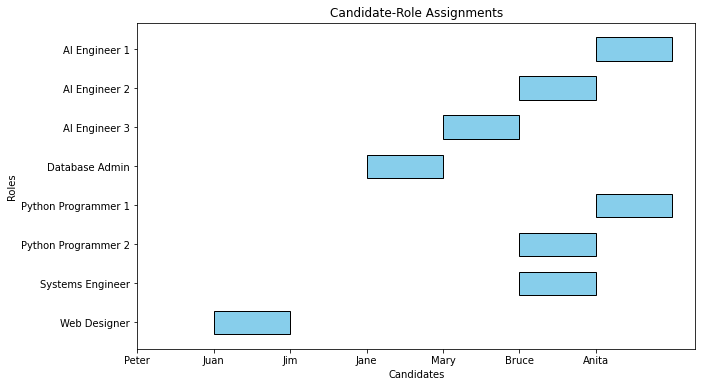

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Extract role assignments from the first solution
assignments = solutions[0]

# Sort roles to ensure consistent order
sorted_roles = sorted(roles)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, role in enumerate(sorted_roles):
    candidate = assignments[role]
    ax.barh(i, 1, left=list(candidates.keys()).index(candidate), color='skyblue', edgecolor='black', height=0.6)

# Set y-axis ticks and labels
ax.set_yticks(range(len(sorted_roles)))
ax.set_yticklabels(sorted_roles)

# Set x-axis ticks and labels
ax.set_xticks(range(len(candidates)))
ax.set_xticklabels(list(candidates.keys()))

# Set plot labels and title
plt.xlabel('Candidates')
plt.ylabel('Roles')
plt.title('Candidate-Role Assignments')

# Invert y-axis to have the roles listed from top to bottom
ax.invert_yaxis()

plt.show()